### **Web Scraping for Billboard Top 100 Dataset**

In [ ]:
#Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import json
import re
import requests
from bs4 import BeautifulSoup
from IPython.core.display import HTML
import seaborn as sns

In [ ]:
#!pip install pandas==1.3.0

#### Scrape and Parse Wikipedia for Billboard Top 100

 Scrape Wikipedia's Billboard Top 100 song pages from 1992 to 2021.

In [ ]:
# your code here
yearstext = {}
url = "http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_{}"
for i in range(1992,2022):
    parse_text = requests.get(url.format(i))
    yearstext[i]=parse_text.text
    time.sleep(0)
    

In [ ]:
soup = BeautifulSoup(yearstext[2021], 'html.parser')

In [ ]:
soup.p

<p>The <a href="/wiki/Billboard_Hot_100" title="Billboard Hot 100"><i>Billboard</i> Hot 100</a> is a chart that ranks the best-performing <a href="/wiki/Single_(music)" title="Single (music)">singles</a> of the United States. Its data, published by <i><a href="/wiki/Billboard_(magazine)" title="Billboard (magazine)">Billboard</a></i> magazine and compiled by <a class="mw-redirect" href="/wiki/Nielsen_SoundScan" title="Nielsen SoundScan">Nielsen SoundScan</a>, is based collectively on each single's weekly <a href="/wiki/CD_single" title="CD single">physical</a> and <a href="/wiki/Digital_distribution" title="Digital distribution">digital</a> sales, as well as <a class="mw-redirect" href="/wiki/Heavy_rotation" title="Heavy rotation">airplay</a> and <a href="/wiki/Streaming_media" title="Streaming media">streaming</a>. At the end of a year, <i>Billboard</i> will publish an annual list of the 100 most successful songs throughout that year on the Hot 100 chart based on the information. For 

In [ ]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Billboard Year-End Hot 100 singles of 2021 - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"12a7c4e5-45ec-4ad5-94e1-343859b12f21","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Billboard_Year-End_Hot_100_singles_of_2021","wgTitle":"Billboard Year-End Hot 100 singles of 2021","wgCurRevisionId":1064645299,"wgRevisionId":1064645299,"wgArticleId":69418946,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["2021 record charts","Billboard charts"],"wgPage

In [ ]:
len(soup.find_all("p"))

1

In [ ]:
soup.table["class"]

['wikitable', 'sortable']

In [ ]:
[t["class"] for t in soup.find_all("table") if t.get("class")]

[['wikitable', 'sortable'],
 ['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner']]

In [ ]:
tables_wikitable = soup.find_all("table", "wikitable")

In [ ]:
len(tables_wikitable)

1

In [ ]:
print(tables_wikitable)

In [ ]:
from IPython.display import HTML
HTML(str(tables_wikitable))

No.,Title,Artist(s)
1,"""Levitating""",Dua Lipa
2,"""Save Your Tears""",The Weeknd and Ariana Grande
3,"""Blinding Lights""",The Weeknd
4,"""Mood""",24kGoldn featuring Iann Dior
5,"""Good 4 U""",Olivia Rodrigo
6,"""Kiss Me More""",Doja Cat featuring SZA
7,"""Leave the Door Open""",Silk Sonic (Bruno Mars and Anderson .Paak)
8,"""Drivers License""",Olivia Rodrigo
9,"""Montero (Call Me by Your Name)""",Lil Nas X
10,"""Peaches""",Justin Bieber featuring Daniel Caesar and Giveon


In [ ]:
rows = [row for row in tables_wikitable[0].find_all('tr')][0:]
rows

In [ ]:
header_row = rows[0]
header_row

<tr>
<th scope="col" style="background:#dde;"><abbr title="Number">No.</abbr>
</th>
<th scope="col" style="background:#dde;">Title
</th>
<th scope="col" style="background:#dde;">Artist(s)
</th></tr>

In [ ]:
columns = [col.get_text() for col in header_row.find_all("th") if col.get_text()]
columns

['No.\n', 'Title\n', 'Artist(s)\n']

In [ ]:
columns = [c.strip() for c in columns]
columns

['No.', 'Title', 'Artist(s)']

Parse the HTML retrieved to extract ranking, song and artist information. 

In [ ]:
year_2021 = yearstext[2021]

In [ ]:
soup = BeautifulSoup(year_2021, 'html.parser')

In [ ]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Billboard Year-End Hot 100 singles of 2021 - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"12a7c4e5-45ec-4ad5-94e1-343859b12f21","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Billboard_Year-End_Hot_100_singles_of_2021","wgTitle":"Billboard Year-End Hot 100 singles of 2021","wgCurRevisionId":1064645299,"wgRevisionId":1064645299,"wgArticleId":69418946,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["2021 record charts","Billboard charts"],"wgPage

In [ ]:
soup.title

<title>Billboard Year-End Hot 100 singles of 2021 - Wikipedia</title>

In [ ]:
soup.p

<p>The <a href="/wiki/Billboard_Hot_100" title="Billboard Hot 100"><i>Billboard</i> Hot 100</a> is a chart that ranks the best-performing <a href="/wiki/Single_(music)" title="Single (music)">singles</a> of the United States. Its data, published by <i><a href="/wiki/Billboard_(magazine)" title="Billboard (magazine)">Billboard</a></i> magazine and compiled by <a class="mw-redirect" href="/wiki/Nielsen_SoundScan" title="Nielsen SoundScan">Nielsen SoundScan</a>, is based collectively on each single's weekly <a href="/wiki/CD_single" title="CD single">physical</a> and <a href="/wiki/Digital_distribution" title="Digital distribution">digital</a> sales, as well as <a class="mw-redirect" href="/wiki/Heavy_rotation" title="Heavy rotation">airplay</a> and <a href="/wiki/Streaming_media" title="Streaming media">streaming</a>. At the end of a year, <i>Billboard</i> will publish an annual list of the 100 most successful songs throughout that year on the Hot 100 chart based on the information. For 

In [ ]:
len(soup.find_all("p"))

1

In [ ]:
soup.table["class"]

['wikitable', 'sortable']

In [ ]:
[t["class"] for t in soup.find_all("table") if t.get("class")]

[['wikitable', 'sortable'],
 ['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner']]

In [ ]:
tables_wikitable = soup.find_all("table", "wikitable")

In [ ]:
len(tables_wikitable)

1

In [ ]:
dfinder = lambda tag: tag.name=='table' and tag.get('class') == ['wikitable']
table_demographics = soup.find_all(dfinder)

In [ ]:
soup.find("table", "wikitable")

<table class="wikitable sortable" style="text-align: center">
<caption>List of songs on <i><a href="/wiki/Billboard_(magazine)" title="Billboard (magazine)">Billboard</a></i><span class="nowrap" style="padding-left:0.1em;">'s</span> 2021 <a href="/wiki/Billboard_Year-End" title="Billboard Year-End">Year-End</a> <a href="/wiki/Billboard_Hot_100" title="Billboard Hot 100">Hot 100</a> chart<sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup>
</caption>
<tbody><tr>
<th scope="col" style="background:#dde;"><abbr title="Number">No.</abbr>
</th>
<th scope="col" style="background:#dde;">Title
</th>
<th scope="col" style="background:#dde;">Artist(s)
</th></tr>
<tr>
<td scope="row">1
</td>
<td>"<a href="/wiki/Levitating_(song)" title="Levitating (song)">Levitating</a>"</td>
<td><a href="/wiki/Dua_Lipa" title="Dua Lipa">Dua Lipa</a>
</td></tr>
<tr>
<td scope="row">2
</td>
<td>"<a href="/wiki/Save_Your_Tears" title="Save Your Tears">Save Your Tears</a>"</td>
<td><a href="/wi

In [ ]:
from IPython.display import HTML
HTML(str(table_demographics))

In [ ]:
row =tables_wikitable[0].find_all('tr')

<font color="purple">
<h3>
1. The first row of the table
</h3>
</font>

In [ ]:
children = list(filter(lambda x: x != '\n', row[1]))
children

[<td scope="row">1
 </td>,
 <td>"<a href="/wiki/Levitating_(song)" title="Levitating (song)">Levitating</a>"</td>,
 <td><a href="/wiki/Dua_Lipa" title="Dua Lipa">Dua Lipa</a>
 </td>]

In [ ]:
print(children[0].string)

1



In [ ]:
band_singers = children[2].find_all('a')

In [ ]:
band_singer = [band.string for band in band_singers]
print(band_singer)

['Dua Lipa']


In [ ]:
url = [url['href'] for url in band_singers]
print(url)

['/wiki/Dua_Lipa']


In [ ]:
songs = children[1].find_all('a')
print(songs)

[<a href="/wiki/Levitating_(song)" title="Levitating (song)">Levitating</a>]


In [ ]:
songurl = [song['href'] for song in songs]
print(songurl)

['/wiki/Levitating_(song)']


In [ ]:
song_title = [song['title'] for song in songs]
print(song_title)

['Levitating (song)']


In [ ]:
len(rows)

101

In [ ]:
def scrap(yearstext,year):
    soup = BeautifulSoup(yearstext[year], 'html.parser')
    tables_wikitable = soup.find_all('table', 'wikitable')
    rows = [row for row in tables_wikitable[0].find_all('tr')][1:]
    yearinfo = []
    for i in range(1,101):
        row =tables_wikitable[0].find_all('tr')
        children = list(filter(lambda x: x !='\n', row[i]))
        ranking = children[0].string
        
        band_singers = children[2].find_all('a')
        
        band_singer = [band.string for band in band_singers]
        #print(band_singer)
        
        url = [url['href'] for url in band_singers]
        #print(url)
        
        songs = children[1].find_all('a')
        #print(songs)
        
        song_title = [song['title'] for song in songs]
        #print(song_title)
        
        songurl = [song['href'] for song in songs]
        
        if url == []:
            url = [None]
        song = [song.string for song in songs]
        if not song:
            song = children[1].string

        if type(song) == list:
            title = '/'.join(str(s) for s in song)
        else:
            title = song
            
        single_dict = {'band_singer': band_singer, 'ranking': ranking, 'song': song,
                   'songurl':songurl, 'titletext':title, 'url': url}
        yearinfo.append(single_dict)
    return yearinfo
    

In [ ]:
yearinfo = scrap(yearstext,2010)

In [ ]:
yearinfo

[{'band_singer': ['Kesha'],
  'ranking': '1',
  'song': ['Tik Tok'],
  'songurl': ['/wiki/Tik_Tok_(song)'],
  'titletext': 'Tik Tok',
  'url': ['/wiki/Kesha']},
 {'band_singer': ['Lady Antebellum'],
  'ranking': '2',
  'song': ['Need You Now'],
  'songurl': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'],
  'titletext': 'Need You Now',
  'url': ['/wiki/Lady_Antebellum']},
 {'band_singer': ['Train'],
  'ranking': '3',
  'song': ['Hey, Soul Sister'],
  'songurl': ['/wiki/Hey,_Soul_Sister'],
  'titletext': 'Hey, Soul Sister',
  'url': ['/wiki/Train_(band)']},
 {'band_singer': ['Katy Perry', 'Snoop Dogg'],
  'ranking': '4',
  'song': ['California Gurls'],
  'songurl': ['/wiki/California_Gurls'],
  'titletext': 'California Gurls',
  'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']},
 {'band_singer': ['Usher', 'will.i.am'],
  'ranking': '5',
  'song': ['OMG'],
  'songurl': ['/wiki/OMG_(Usher_song)'],
  'titletext': 'OMG',
  'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']},
 {'band_singer':

Save this dictionary as a json file so you do not need to run it over and over again.

In [ ]:
# your code here 

json_file = open("data.json", "w")
json_file = json.dump(yearinfo, json_file)


In [ ]:
json_file = open("data.json", "r")
yearinfo_loaded = json.load(json_file)

In [ ]:
yearinfo_loaded

[{'band_singer': ['Kesha'],
  'ranking': '1',
  'song': ['Tik Tok'],
  'songurl': ['/wiki/Tik_Tok_(song)'],
  'titletext': 'Tik Tok',
  'url': ['/wiki/Kesha']},
 {'band_singer': ['Lady Antebellum'],
  'ranking': '2',
  'song': ['Need You Now'],
  'songurl': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'],
  'titletext': 'Need You Now',
  'url': ['/wiki/Lady_Antebellum']},
 {'band_singer': ['Train'],
  'ranking': '3',
  'song': ['Hey, Soul Sister'],
  'songurl': ['/wiki/Hey,_Soul_Sister'],
  'titletext': 'Hey, Soul Sister',
  'url': ['/wiki/Train_(band)']},
 {'band_singer': ['Katy Perry', 'Snoop Dogg'],
  'ranking': '4',
  'song': ['California Gurls'],
  'songurl': ['/wiki/California_Gurls'],
  'titletext': 'California Gurls',
  'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']},
 {'band_singer': ['Usher', 'will.i.am'],
  'ranking': '5',
  'song': ['OMG'],
  'songurl': ['/wiki/OMG_(Usher_song)'],
  'titletext': 'OMG',
  'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']},
 {'band_singer':

In [ ]:
len(yearinfo_loaded)

100

#### Question 2: Construct a DataFrame from parsed data

**2.1** Construct a dataframe from the dictionary ```yearinfo```

In [ ]:
# your code here 
first_one = list(yearinfo[0].values())
first_one

[['Kesha'],
 '1',
 ['Tik Tok'],
 ['/wiki/Tik_Tok_(song)'],
 'Tik Tok',
 ['/wiki/Kesha']]

In [ ]:
new = pd.DataFrame.from_dict(yearinfo)
new.head()

,band_singer,ranking,song,songurl,titletext,url
0,[Kesha],1,[Tik Tok],[/wiki/Tik_Tok_(song)],Tik Tok,[/wiki/Kesha]
1,[Lady Antebellum],2,[Need You Now],[/wiki/Need_You_Now_(Lady_Antebellum_song)],Need You Now,[/wiki/Lady_Antebellum]
2,[Train],3,"[Hey, Soul Sister]","[/wiki/Hey,_Soul_Sister]","Hey, Soul Sister",[/wiki/Train_(band)]
3,"[Katy Perry, Snoop Dogg]",4,[California Gurls],[/wiki/California_Gurls],California Gurls,"[/wiki/Katy_Perry, /wiki/Snoop_Dogg]"
4,"[Usher, will.i.am]",5,[OMG],[/wiki/OMG_(Usher_song)],OMG,"[/wiki/Usher_(musician), /wiki/Will.i.am]"


**2.2** Check your dataframes data types and convert them to the correct data types if needed. 

In [ ]:
# your code here 
new.describe()

,band_singer,ranking,song,songurl,titletext,url
count,100,100,100,100,100,100
unique,84,100,100,100,100,84
top,[The Black Eyed Peas],86,[My Chick Bad],[/wiki/My_Chick_Bad],Breakeven,[/wiki/The_Black_Eyed_Peas]
freq,4,1,1,1,1,4


**2.3** Store this dataframe so you won't need to run this again!

The easiest way is to pickle it using to_pickle:

In [ ]:
# your code here 
billboard_dict={}
for i in range(1992,2022):
    x=scrap(yearstext,i)
    billboard_dict[i]=x

In [ ]:
print(len(billboard_dict[1992]))


100


In [ ]:
billboard_dict[1992][20]

{'band_singer': ['Madonna'],
 'ranking': '21',
 'song': ['This Used to Be My Playground'],
 'songurl': ['/wiki/This_Used_to_Be_My_Playground'],
 'titletext': 'This Used to Be My Playground',
 'url': ['/wiki/Madonna']}

In [ ]:
billboard_dict[1992][21]

{'band_singer': ['Patty Smyth', 'Don Henley'],
 'ranking': '22',
 'song': ["Sometimes Love Just Ain't Enough"],
 'songurl': ['/wiki/Sometimes_Love_Just_Ain%27t_Enough'],
 'titletext': "Sometimes Love Just Ain't Enough",
 'url': ['/wiki/Patty_Smyth', '/wiki/Don_Henley']}

In [ ]:
data = pd.DataFrame() 

In [ ]:
for i in range(1992,2022):
    check = pd.DataFrame.from_dict(billboard_dict[i])
    check['year']=i
    data = pd.concat([data, check], axis=0)

In [ ]:
data.head(10)

,band_singer,ranking,song,songurl,titletext,url,year
0,[Boyz II Men],1,[End of the Road],[/wiki/End_of_the_Road_(Boyz_II_Men_song)],End of the Road,[/wiki/Boyz_II_Men],1992
1,[Sir Mix-a-Lot],2,[Baby Got Back],[/wiki/Baby_Got_Back],Baby Got Back,[/wiki/Sir_Mix-a-Lot],1992
2,[Kris Kross],3,[Jump],[/wiki/Jump_(Kris_Kross_song)],Jump,[/wiki/Kris_Kross],1992
3,[Vanessa Williams],4,[Save the Best for Last],[/wiki/Save_the_Best_for_Last],Save the Best for Last,[/wiki/Vanessa_L._Williams],1992
4,[TLC],5,[Baby-Baby-Baby],[/wiki/Baby-Baby-Baby],Baby-Baby-Baby,[/wiki/TLC_(band)],1992
5,[Eric Clapton],6,[Tears in Heaven],[/wiki/Tears_in_Heaven],Tears in Heaven,[/wiki/Eric_Clapton],1992
6,[En Vogue],7,[My Lovin' (You're Never Gonna Get It)],[/wiki/My_Lovin%27_(You%27re_Never_Gonna_Get_It)],My Lovin' (You're Never Gonna Get It),[/wiki/En_Vogue],1992
7,[Red Hot Chili Peppers],8,[Under the Bridge],[/wiki/Under_the_Bridge],Under the Bridge,[/wiki/Red_Hot_Chili_Peppers],1992
8,[Color Me Badd],9,[All 4 Love],[/wiki/All_4_Love],All 4 Love,[/wiki/Color_Me_Badd],1992
9,[Jon Secada],10,[Just Another Day],[/wiki/Just_Another_Day_(Jon_Secada_song)],Just Another Day,[/wiki/Jon_Secada],1992


In [ ]:
data.shape

(3000, 7)

In [ ]:
data.ranking = data.ranking.str.strip('\n')

In [ ]:
data = data.sort_values(by=['ranking','year'])

In [ ]:
data.head(30)

,band_singer,ranking,song,songurl,titletext,url,year
0,[Boyz II Men],1,[End of the Road],[/wiki/End_of_the_Road_(Boyz_II_Men_song)],End of the Road,[/wiki/Boyz_II_Men],1992
0,[Whitney Houston],1,[I Will Always Love You],[/wiki/I_Will_Always_Love_You#Whitney_Houston_...,I Will Always Love You,[/wiki/Whitney_Houston],1993
0,[Ace of Base],1,[The Sign],[/wiki/The_Sign_(song)],The Sign,[/wiki/Ace_of_Base],1994
0,"[Coolio, L.V.]",1,[Gangsta's Paradise],[/wiki/Gangsta%27s_Paradise],Gangsta's Paradise,"[/wiki/Coolio, /wiki/L.V._(singer)]",1995
0,[Los del Río],1,[Macarena],[/wiki/Macarena_(song)],Macarena,[/wiki/Los_del_R%C3%ADo],1996
0,[Elton John],1,"[Candle in the Wind 1997, Something About the ...","[/wiki/Candle_in_the_Wind_1997, /wiki/Somethin...",Candle in the Wind 1997/Something About the Wa...,[/wiki/Elton_John],1997
0,[Next],1,[Too Close],[/wiki/Too_Close_(Next_song)],Too Close,[/wiki/Next_(group)],1998
0,[Cher],1,[Believe],[/wiki/Believe_(Cher_song)],Believe,[/wiki/Cher],1999
0,[Faith Hill],1,[Breathe],[/wiki/Breathe_(Faith_Hill_song)],Breathe,[/wiki/Faith_Hill],2000
0,[Lifehouse],1,[Hanging by a Moment],[/wiki/Hanging_by_a_Moment],Hanging by a Moment,[/wiki/Lifehouse_(band)],2001


cols = ['band_singer', 'song', 'songurl', 'url']
for col in cols:
    data[col] = data[col].apply(lambda x: x[0] if type(x) == list and len(x)==1 else x)
    data[col] = data[col].apply(lambda x: x[0]+","+x[1] if type(x) == list and len(x)==2 else x)
    data[col] = data[col].apply(lambda x: x[0]+","+x[1]+","+x[2] if type(x) == list and len(x)==3 else x)

In [ ]:
data.head(10)

,band_singer,ranking,song,songurl,titletext,url,year
0,[Boyz II Men],1,[End of the Road],[/wiki/End_of_the_Road_(Boyz_II_Men_song)],End of the Road,[/wiki/Boyz_II_Men],1992
0,[Whitney Houston],1,[I Will Always Love You],[/wiki/I_Will_Always_Love_You#Whitney_Houston_...,I Will Always Love You,[/wiki/Whitney_Houston],1993
0,[Ace of Base],1,[The Sign],[/wiki/The_Sign_(song)],The Sign,[/wiki/Ace_of_Base],1994
0,"[Coolio, L.V.]",1,[Gangsta's Paradise],[/wiki/Gangsta%27s_Paradise],Gangsta's Paradise,"[/wiki/Coolio, /wiki/L.V._(singer)]",1995
0,[Los del Río],1,[Macarena],[/wiki/Macarena_(song)],Macarena,[/wiki/Los_del_R%C3%ADo],1996
0,[Elton John],1,"[Candle in the Wind 1997, Something About the ...","[/wiki/Candle_in_the_Wind_1997, /wiki/Somethin...",Candle in the Wind 1997/Something About the Wa...,[/wiki/Elton_John],1997
0,[Next],1,[Too Close],[/wiki/Too_Close_(Next_song)],Too Close,[/wiki/Next_(group)],1998
0,[Cher],1,[Believe],[/wiki/Believe_(Cher_song)],Believe,[/wiki/Cher],1999
0,[Faith Hill],1,[Breathe],[/wiki/Breathe_(Faith_Hill_song)],Breathe,[/wiki/Faith_Hill],2000
0,[Lifehouse],1,[Hanging by a Moment],[/wiki/Hanging_by_a_Moment],Hanging by a Moment,[/wiki/Lifehouse_(band)],2001


In [ ]:
data[(data['band_singer']=='Elton John')]

,band_singer,ranking,song,songurl,titletext,url,year


In [ ]:
data2=data.copy()

In [ ]:
data2.head()

,band_singer,ranking,song,songurl,titletext,url,year
0,[Boyz II Men],1,[End of the Road],[/wiki/End_of_the_Road_(Boyz_II_Men_song)],End of the Road,[/wiki/Boyz_II_Men],1992
0,[Whitney Houston],1,[I Will Always Love You],[/wiki/I_Will_Always_Love_You#Whitney_Houston_...,I Will Always Love You,[/wiki/Whitney_Houston],1993
0,[Ace of Base],1,[The Sign],[/wiki/The_Sign_(song)],The Sign,[/wiki/Ace_of_Base],1994
0,"[Coolio, L.V.]",1,[Gangsta's Paradise],[/wiki/Gangsta%27s_Paradise],Gangsta's Paradise,"[/wiki/Coolio, /wiki/L.V._(singer)]",1995
0,[Los del Río],1,[Macarena],[/wiki/Macarena_(song)],Macarena,[/wiki/Los_del_R%C3%ADo],1996


In [ ]:
data2[['song','songurl']]

,song,songurl
0,[End of the Road],[/wiki/End_of_the_Road_(Boyz_II_Men_song)]
0,[I Will Always Love You],[/wiki/I_Will_Always_Love_You#Whitney_Houston_...
0,[The Sign],[/wiki/The_Sign_(song)]
0,[Gangsta's Paradise],[/wiki/Gangsta%27s_Paradise]
0,[Macarena],[/wiki/Macarena_(song)]
...,...,...
98,[Look at Me!],[/wiki/Look_at_Me_(XXXTentacion_song)]
98,[Mi Gente],[/wiki/Mi_Gente_(J_Balvin_and_Willy_William_so...
98,[Walk Me Home],[/wiki/Walk_Me_Home_(Pink_song)]
98,[Slide],[/wiki/Slide_(H.E.R._song)]


In [ ]:
type(data2['titletext'])

pandas.core.series.Series

In [ ]:
data2[data2['band_singer']=='Elton John']

,band_singer,ranking,song,songurl,titletext,url,year


In [ ]:
data2.head()

,band_singer,ranking,song,songurl,titletext,url,year
0,[Boyz II Men],1,[End of the Road],[/wiki/End_of_the_Road_(Boyz_II_Men_song)],End of the Road,[/wiki/Boyz_II_Men],1992
0,[Whitney Houston],1,[I Will Always Love You],[/wiki/I_Will_Always_Love_You#Whitney_Houston_...,I Will Always Love You,[/wiki/Whitney_Houston],1993
0,[Ace of Base],1,[The Sign],[/wiki/The_Sign_(song)],The Sign,[/wiki/Ace_of_Base],1994
0,"[Coolio, L.V.]",1,[Gangsta's Paradise],[/wiki/Gangsta%27s_Paradise],Gangsta's Paradise,"[/wiki/Coolio, /wiki/L.V._(singer)]",1995
0,[Los del Río],1,[Macarena],[/wiki/Macarena_(song)],Macarena,[/wiki/Los_del_R%C3%ADo],1996


In [ ]:
data2

,band_singer,ranking,song,songurl,titletext,url,year
0,[Boyz II Men],1,[End of the Road],[/wiki/End_of_the_Road_(Boyz_II_Men_song)],End of the Road,[/wiki/Boyz_II_Men],1992
0,[Whitney Houston],1,[I Will Always Love You],[/wiki/I_Will_Always_Love_You#Whitney_Houston_...,I Will Always Love You,[/wiki/Whitney_Houston],1993
0,[Ace of Base],1,[The Sign],[/wiki/The_Sign_(song)],The Sign,[/wiki/Ace_of_Base],1994
0,"[Coolio, L.V.]",1,[Gangsta's Paradise],[/wiki/Gangsta%27s_Paradise],Gangsta's Paradise,"[/wiki/Coolio, /wiki/L.V._(singer)]",1995
0,[Los del Río],1,[Macarena],[/wiki/Macarena_(song)],Macarena,[/wiki/Los_del_R%C3%ADo],1996
...,...,...,...,...,...,...,...
98,[XXXTentacion],99,[Look at Me!],[/wiki/Look_at_Me_(XXXTentacion_song)],Look at Me!,[/wiki/XXXTentacion],2017
98,"[J Balvin, Willy William, Beyoncé]",99,[Mi Gente],[/wiki/Mi_Gente_(J_Balvin_and_Willy_William_so...,Mi Gente,"[/wiki/J_Balvin, /wiki/Willy_William, /wiki/Be...",2018
98,[Pink],99,[Walk Me Home],[/wiki/Walk_Me_Home_(Pink_song)],Walk Me Home,[/wiki/Pink_(singer)],2019
98,"[H.E.R., YG]",99,[Slide],[/wiki/Slide_(H.E.R._song)],Slide,"[/wiki/H.E.R., /wiki/YG_(rapper)]",2020


In [ ]:
pd. __version__

'1.1.5'

In [ ]:
data3 = data2[["band_singer","url","year","ranking"]]
data3.reset_index(drop=True,inplace=True)
data4 = data2[["song","songurl","year","ranking"]]
data4.reset_index(drop=True,inplace=True)

In [ ]:
data3

,band_singer,url,year,ranking
0,[Boyz II Men],[/wiki/Boyz_II_Men],1992,1
1,[Whitney Houston],[/wiki/Whitney_Houston],1993,1
2,[Ace of Base],[/wiki/Ace_of_Base],1994,1
3,"[Coolio, L.V.]","[/wiki/Coolio, /wiki/L.V._(singer)]",1995,1
4,[Los del Río],[/wiki/Los_del_R%C3%ADo],1996,1
...,...,...,...,...
2995,[XXXTentacion],[/wiki/XXXTentacion],2017,99
2996,"[J Balvin, Willy William, Beyoncé]","[/wiki/J_Balvin, /wiki/Willy_William, /wiki/Be...",2018,99
2997,[Pink],[/wiki/Pink_(singer)],2019,99
2998,"[H.E.R., YG]","[/wiki/H.E.R., /wiki/YG_(rapper)]",2020,99


In [ ]:
songs_url= data4.apply(pd.Series.explode)

In [ ]:
bandandurl = data3.apply(pd.Series.explode)

In [ ]:
final = pd.merge(songs_url, bandandurl, on=['ranking','year'])
final

,song,songurl,year,ranking,band_singer,url
0,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),1992,1,Boyz II Men,/wiki/Boyz_II_Men
1,I Will Always Love You,/wiki/I_Will_Always_Love_You#Whitney_Houston_v...,1993,1,Whitney Houston,/wiki/Whitney_Houston
2,The Sign,/wiki/The_Sign_(song),1994,1,Ace of Base,/wiki/Ace_of_Base
3,Gangsta's Paradise,/wiki/Gangsta%27s_Paradise,1995,1,Coolio,/wiki/Coolio
4,Gangsta's Paradise,/wiki/Gangsta%27s_Paradise,1995,1,L.V.,/wiki/L.V._(singer)
...,...,...,...,...,...,...
4067,Walk Me Home,/wiki/Walk_Me_Home_(Pink_song),2019,99,Pink,/wiki/Pink_(singer)
4068,Slide,/wiki/Slide_(H.E.R._song),2020,99,H.E.R.,/wiki/H.E.R.
4069,Slide,/wiki/Slide_(H.E.R._song),2020,99,YG,/wiki/YG_(rapper)
4070,Drinkin' Beer. Talkin' God. Amen.,/wiki/Drinkin%27_Beer._Talkin%27_God._Amen.,2021,99,Chase Rice,/wiki/Chase_Rice


In [ ]:
billboardtop = final
billboardtop.head()

,song,songurl,year,ranking,band_singer,url
0,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),1992,1,Boyz II Men,/wiki/Boyz_II_Men
1,I Will Always Love You,/wiki/I_Will_Always_Love_You#Whitney_Houston_v...,1993,1,Whitney Houston,/wiki/Whitney_Houston
2,The Sign,/wiki/The_Sign_(song),1994,1,Ace of Base,/wiki/Ace_of_Base
3,Gangsta's Paradise,/wiki/Gangsta%27s_Paradise,1995,1,Coolio,/wiki/Coolio
4,Gangsta's Paradise,/wiki/Gangsta%27s_Paradise,1995,1,L.V.,/wiki/L.V._(singer)


In [ ]:
billboardtop.shape

(4072, 6)

#### Scrape and Parse Wikipedia for information about Artists and Bands

**1.1** Scrape the artist's Wikipedia webpages.

In [ ]:
urlcache={}
def get_page(url):
    if (url not in urlcache) or (urlcache[url]==1) or (urlcache[url]==2):
        time.sleep(1)
        try:
            r = requests.get("http://en.wikipedia.org%s" % url)
            if r.status_code == 200:
                urlcache[url] = r.text
            else:
                urlcache[url] = 1
        except:
            urlcache[url] = 2
    return urlcache[url]

Before we apply our function to the dataframe, let us sort `billboardtop` by year. This will ensure that we will hit the cache most as singers who show up repeatedly in the rankings will have their information already pulled.

In [ ]:
billboardtop=billboardtop.sort_values('year')
billboardtop.head()

,song,songurl,year,ranking,band_singer,url
0,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),1992,1,Boyz II Men,/wiki/Boyz_II_Men
2827,Friday I'm in Love,/wiki/Friday_I%27m_in_Love,1992,71,The Cure,/wiki/The_Cure
2791,Do I Have to Say the Words?,/wiki/Do_I_Have_to_Say_the_Words%3F,1992,70,Bryan Adams,/wiki/Bryan_Adams
2750,My Lovin' (You're Never Gonna Get It),/wiki/My_Lovin%27_(You%27re_Never_Gonna_Get_It),1992,7,En Vogue,/wiki/En_Vogue
321,I'll Be There,/wiki/I%27ll_Be_There_(The_Jackson_5_song)#Mar...,1992,16,Mariah Carey,/wiki/Mariah_Carey


In [ ]:
# Here we are populating the url cache
# Note that this function will take around 20 minutes to run as we are requesting for several pages
# This function is designed to be run again and again: it just tries to make sure that there are no unresolved pages left. 
billboardtop["url"].apply(get_page)

0       <!DOCTYPE html>\n<html class="client-nojs" lan...
2827    <!DOCTYPE html>\n<html class="client-nojs" lan...
2791    <!DOCTYPE html>\n<html class="client-nojs" lan...
2750    <!DOCTYPE html>\n<html class="client-nojs" lan...
321     <!DOCTYPE html>\n<html class="client-nojs" lan...
                              ...                        
2351    <!DOCTYPE html>\n<html class="client-nojs" lan...
2350    <!DOCTYPE html>\n<html class="client-nojs" lan...
3923    <!DOCTYPE html>\n<html class="client-nojs" lan...
3884    <!DOCTYPE html>\n<html class="client-nojs" lan...
4071    <!DOCTYPE html>\n<html class="client-nojs" lan...
Name: url, Length: 4072, dtype: object

In [ ]:
# Let us make sure that there are no unresolved pages
# The sum below should be 0, and the boolean True. If that is not the case, run the above cell again until you get a sum of 0 and a boolean True
print (np.sum([(urlcache[k]==1) or (urlcache[k]==2) and isinstance(k,str) for k in urlcache]))
print ("Did we get all the URLs?",len(billboardtop.url.unique())==len(urlcache))

0
Did we get all the URLs? True


In [ ]:
# Let's save the `urlcache` and remove the old object. 
# your code here 
with open("urlinfo.json","w") as fd:
    json.dump(urlcache, fd)
#del urlcache;

In [ ]:
with open("urlinfo.json") as json_file:
    urlloaded = json.load(json_file)

**1.2** Parse the HTML retrieved to extract genre of the artist, date of birth, years active and other artist information.

Before parsing, it is important to note that Wikipedia has defined the same genre in a few different ways. Your parsing code will pick these up as different and new as they all differ with the alphabet case or an underscore instead of a hyphen.

We have defined a function to ensure that we have the correct representation of the number of artists in a particular genre. 

In [ ]:
genres_duplicates={'/wiki/Adult_Contemporary_music':'/wiki/Adult_contemporary',
 '/wiki/Adult_contemporary_music':'/wiki/Adult_contemporary',
'/wiki/Afrobeat':'/wiki/Afrobeats',
'/wiki/Alternative_rock':'/wiki/Alternative_Rock',
'/wiki/Avant-garde':'/wiki/Avant-garde_music',
'/wiki/Blues':'/wiki/Blues_music',
'/wiki/Comedy_hip-hop':'/wiki/Comedy_hip_hop',
'/wiki/Contemporary_R%26B':'/wiki/Contemporary_R%26B_music',
'/wiki/Contemporary_folk':'/wiki/Contemporary_folk_music',
'/wiki/Country_Folk':'/wiki/Country_folk',
'/wiki/Dance_pop':'/wiki/Dance-pop',
'/wiki/East_Coast_hip_hop':'/wiki/East_coast_hip_hop',
'/wiki/Electronic_Dance_Music':'/wiki/Electronic_dance_music',
'/wiki/Electronica':'/wiki/Electronica_music',
'/wiki/Emo':'/wiki/Emo_music',
'/wiki/Electropop':'/wiki/Electro-pop',
'/wiki/Folk-pop':'/wiki/Folk_pop',
'/wiki/Funk':'/wiki/Funk_music',
'/wiki/Grime_(music_genre)':'/wiki/Grime_music',
'/wiki/Gangsta_Rap':'/wiki/Gangsta_rap',
'/wiki/Hip_Hop_music': '/wiki/Hip_hop','/wiki/Hip_hop_music':'/wiki/Hip_hop',
'/wiki/Hyphy':'/wiki/Hyphy_music',
'/wiki/Latin_music':'/wiki/Latin_music_(genre)',
'/wiki/West_Coast_hip_hop':'/wiki/West_coast_hip_hop',
'/wiki/Southern_Hip_Hop':'/wiki/Southern_hip_hop',
'/wiki/Ska':'/wiki/Ska_music',
'/wiki/Pop-rock':'/wiki/Pop_rock',
'/wiki/Pop_Music':'/wiki/Pop_music',
'/wiki/Nu_metal':'/wiki/Nu_metal_music',
'/wiki/Hard_Rock':'/wiki/Hard_rock',
'/wiki/Pop_Rock':'/wiki/Pop_rock',
'/wiki/Post-Grunge':'/wiki/Post-grunge',
'/wiki/SoundCloud_rap':'/wiki/Soundcloud_rap'}

def genre_duplicates(genres):
    for i in range(len(genres)):
        if genres[i] in genres_duplicates.keys():
            genres[i]=genres_duplicates[genres[i]]
    return genres 

Please write the function `singer_band_info` according to the following specification.

In [ ]:
#Store the list and delete the variable
list_of_url = list(urlcache.keys())

In [ ]:
list_of_url[0]

'/wiki/Boyz_II_Men'

In [ ]:
len(set(list_of_url))

1317

In [ ]:
url_first = "http://en.wikipedia.org/"+list_of_url[0]
artist = requests.get(url_first)
artist_text=artist.text
time.sleep(1)

In [ ]:
soup = BeautifulSoup(artist_text,'html.parser')

In [ ]:
soup.p

<p><b>Boyz II Men</b> (pronounced <i>boys to men</i>), also known as <b>B2M</b>, is an American <a href="/wiki/Vocal_harmony" title="Vocal harmony">vocal harmony</a> group from <a href="/wiki/Philadelphia" title="Philadelphia">Philadelphia</a>, <a href="/wiki/Pennsylvania" title="Pennsylvania">Pennsylvania</a>, best known for emotional ballads and <a href="/wiki/A_cappella" title="A cappella">a cappella</a> harmonies. They are currently a trio composed of baritone <a href="/wiki/Nathan_Morris" title="Nathan Morris">Nathan Morris</a> alongside tenors <a href="/wiki/Wanya_Morris" title="Wanya Morris">Wanya Morris</a> and <a href="/wiki/Shawn_Stockman" title="Shawn Stockman">Shawn Stockman</a>. During the 1990s, Boyz II Men found fame on <a class="mw-redirect" href="/wiki/Motown_Records" title="Motown Records">Motown Records</a> as a quartet including bass <a href="/wiki/Michael_McCary" title="Michael McCary">Michael McCary</a>, who left the group in 2003 due to back spasms that were even

In [ ]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Boyz II Men - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"fa4ec881-66e8-4738-9400-da0bf8d331f7","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Boyz_II_Men","wgTitle":"Boyz II Men","wgCurRevisionId":1065622124,"wgRevisionId":1065622124,"wgArticleId":161232,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external links from July 2021","CS1: long volume value","Articles with short descri

In [ ]:
soup.table["class"]

['infobox', 'vcard', 'plainlist']

In [ ]:
[t["class"] for t in soup.find_all("table") if t.get("class")]

[['infobox', 'vcard', 'plainlist'],
 ['wikitable'],
 ['wikitable', 'plainrowheaders'],
 ['wikitable', 'plainrowheaders'],
 ['wikitable', 'plainrowheaders'],
 ['wikitable', 'plainrowheaders'],
 ['wikitable', 'plainrowheaders'],
 ['mbox-small', 'plainlinks', 'sistersitebox'],
 ['nowraplinks',
  'vcard',
  'hlist',
  'mw-collapsible',
  'expanded',
  'navbox-inner'],
 ['nowraplinks', 'mw-collapsible', 'mw-collapsed', 'navbox-inner'],
 ['nowraplinks', 'hlist', 'mw-collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'hlist', 'mw-collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'hlist', 'mw-collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'hlist', 'mw-collapsible', 'autocollapse', 'navbox-inner']]

In [ ]:
tables_wikitable = soup.find_all("table", "wikitable")

In [ ]:
len(tables_wikitable)

6

###For the first link **(Boyz II Men)**

In [ ]:
table = soup.find("table", attrs={"class": "infobox"})

In [ ]:
from IPython.display import HTML
HTML(str(table))

In [ ]:
your_data2 = list()
content2 = list()
for line in soup.findAll('th', attrs={'class': 'infobox-label'}):
    your_data2.append(line.text)

In [ ]:
for line in soup.findAll('td', attrs={'class': 'infobox-data'}):
    content2.append(line.text)

In [ ]:
your_data2

['Also known as',
 'Origin',
 'Genres',
 'Years active',
 'Labels',
 'Members',
 'Past members']

In [ ]:
content2

['Unique Attraction',
 'Philadelphia, Pennsylvania, U.S.',
 'R&Bsoulpopnew jack swing',
 '1988–present[1]',
 'MotownUniversalAristaMSMKochDecca',
 '\nNathan Morris\nShawn Stockman\nWanya Morris\n',
 '\nMichael McCary\nMarc Nelson\n']

In [ ]:
row =table.find_all('tr')

In [ ]:
children = list(filter(lambda x: x != '\n', row[5]))
children

[<th class="infobox-label" scope="row">Genres</th>,
 <td class="infobox-data"><div class="hlist hlist-separated"><ul><li><a href="/wiki/Contemporary_R%26B" title="Contemporary R&amp;B">R&amp;B</a></li><li><a href="/wiki/Soul_music" title="Soul music">soul</a></li><li><a href="/wiki/Pop_music" title="Pop music">pop</a></li><li><a href="/wiki/New_jack_swing" title="New jack swing">new jack swing</a></li></ul></div></td>]

In [ ]:
print(children[0].string)

Genres


In [ ]:
genres = children[1].find_all('a')
print(genres)

[<a href="/wiki/Contemporary_R%26B" title="Contemporary R&amp;B">R&amp;B</a>, <a href="/wiki/Soul_music" title="Soul music">soul</a>, <a href="/wiki/Pop_music" title="Pop music">pop</a>, <a href="/wiki/New_jack_swing" title="New jack swing">new jack swing</a>]


In [ ]:
genre = [x.string for x in genres]
print(genre)

['R&B', 'soul', 'pop', 'new jack swing']


In [ ]:
genre_url = [g_url['href'] for g_url in genres]
print(genre_url)

['/wiki/Contemporary_R%26B', '/wiki/Soul_music', '/wiki/Pop_music', '/wiki/New_jack_swing']


In [ ]:
row2 =table.find_all('td')

In [ ]:
children_2 = list(filter(lambda x: x != '\n', row2[4]))
children_2[0]

'1988–present'

###**URL (with born)**

In [ ]:
list_of_url[2]

In [ ]:
url_second = "http://en.wikipedia.org/"+list_of_url[2]
artist2 = requests.get(url_second)
artist_text2=artist2.text
time.sleep(1)

In [ ]:
soup = BeautifulSoup(artist_text2,'html.parser')

In [ ]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Bryan Adams - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b322f43c-e1cd-4e0d-a9b1-746decc89ee3","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Bryan_Adams","wgTitle":"Bryan Adams","wgCurRevisionId":1067932929,"wgRevisionId":1067932929,"wgArticleId":192892,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template archiveis links","CS1 Danish-language sources (da)","CS1 Dutch-language sources (nl)","CS1 Italian-language sources (it)",

In [ ]:
table2 = soup.find("table", attrs={"class": "infobox"})

In [ ]:
from IPython.display import HTML
HTML(str(table2))

In [ ]:
children = list(filter(lambda x: x != '\n', row[5]))
children

[<th class="infobox-label" scope="row">Genres</th>,
 <td class="infobox-data"><div class="hlist hlist-separated"><ul><li><a href="/wiki/Rock_music" title="Rock music">Rock</a><sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup></li><li><a href="/wiki/Pop_rock" title="Pop rock">pop rock</a></li><li><a href="/wiki/Soft_rock" title="Soft rock">soft rock</a></li><li><a href="/wiki/Arena_rock" title="Arena rock">arena rock</a></li></ul></div></td>]

In [ ]:
genres = children[1].find_all('a')
print(genres)

[<a href="/wiki/Rock_music" title="Rock music">Rock</a>, <a href="#cite_note-1">[1]</a>, <a href="/wiki/Pop_rock" title="Pop rock">pop rock</a>, <a href="/wiki/Soft_rock" title="Soft rock">soft rock</a>, <a href="/wiki/Arena_rock" title="Arena rock">arena rock</a>]


In [ ]:
genre_url = [g_url['href'] for g_url in genres]
print(genre_url)

['/wiki/Rock_music', '#cite_note-1', '/wiki/Pop_rock', '/wiki/Soft_rock', '/wiki/Arena_rock']


In [ ]:
row2 =table2.find_all('td')

In [ ]:
children_2 = list(filter(lambda x: x != '\n', row2[6]))
children_2[0]

'1975–present'

In [ ]:
children_3 = list(filter(lambda x: x != '\n', row[4]))
children_3[1]

<td class="infobox-data"><span style="display:none"> (<span class="bday">1959-11-05</span>) </span>5 November 1959<span class="noprint ForceAgeToShow"> (age 62)</span><br/><a href="/wiki/Kingston,_Ontario" title="Kingston, Ontario">Kingston, Ontario</a>, Canada</td>

In [ ]:
table2.find_all('span')

[<span class="nowrap">Birth name</span>,
 <span style="display:none"> (<span class="bday">1959-11-05</span>) </span>,
 <span class="bday">1959-11-05</span>,
 <span class="noprint ForceAgeToShow"> (age 62)</span>,
 <span class="nowrap">Occupation(s)</span>,
 <span class="nowrap">Years active</span>,
 <span class="nowrap">Associated acts</span>,
 <span class="url"><a class="external text" href="https://www.bryanadams.com" rel="nofollow">www<wbr/>.bryanadams<wbr/>.com</a></span>]

###Final solution

In [ ]:
your_data = list()
content = list()
for line in soup.findAll('th', attrs = { 'class':'infobox-label'}):
    your_data.append(line.string)

In [ ]:
for line in soup.findAll('td', attrs = { 'class':'infobox-data'}):
    content.append(line.text)

In [ ]:
content

['Bryan Guy Adams',
 ' (1959-11-05) 5 November 1959 (age\xa062)Kingston, Ontario, Canada',
 'Rock[1]pop rocksoft rockarena rock',
 'Guitaristsingercomposerrecord producerphilanthropistactivist',
 'Vocalsguitarbass guitarharmonicapiano',
 '1975–present',
 'A&MPolydorUniversalBMG',
 'Bob ClearmountainHans ZimmerRobert John "Mutt" Lange',
 'www.bryanadams.com ']

In [ ]:
your_data

['Birth name',
 'Born',
 'Genres',
 'Occupation(s)',
 'Instruments',
 'Years active',
 'Labels',
 'Associated acts',
 'Website']

In [ ]:
#r = re.compile(".*ive")

In [ ]:
#newlist = list(filter(r.match, your_data)) # Read Note below
#print(newlist)

['Years active']


In [ ]:
res = {your_data[i]: content[i] for i in range(len(your_data))}

In [ ]:
res['Genres'].split(' ')

In [ ]:
res

###Defining the Singer Band Info Function

In [ ]:
if 'Genres' in result.keys():
  

In [ ]:
def singer_band_info(url, page_text):   
    soup = BeautifulSoup(page_text,'html.parser')
    label = list()
    data_inside = list()
    for line in soup.findAll('th', attrs = { 'class':'infobox-label'}):
      label.append(line.text) 
    
    r = re.compile(".*ive")
    newlist = list(filter(r.match, label)) # Read Note below
    if(len(newlist)>0):
      index = label.index(newlist[0])
      label[index] = 'Years active'


    r2 = re.compile(r'Gen')
    newlist2 = list(filter(r2.match, label))
    if(len(newlist2)>0): 
      index2 = label.index(newlist2[0])
      label[index2] = 'Genres'

    for line in soup.findAll('td', attrs = { 'class':'infobox-data'}):
      data_inside.append(line.text)

    result = {label[i]: data_inside[i] for i in range(len(label))}

    
    if 'Years active'in result.keys():
      ya = result['Years active']
    else:
      ya = 'NA'
    
    url = url
    if 'Genres' in result.keys():
      genres = result['Genres'].split()
    else:
      genres = 'NA'

    if 'Born' not in result.keys():
      Born = 'NA'
    else:
      Born = result['Born'][14:29]
    
    band_info_dict = {'url':url,'ya':ya,'Born':Born,'Genres':genres}
    return band_info_dict


In [ ]:
list_of_info = []
dummy = "http://en.wikipedia.org/{}"
for url in list_of_url:
  url_first = dummy.format(url)
  artist = requests.get(url_first)
  artist_text=artist.text
  time.sleep(1)
  x = singer_band_info(url,artist_text)
  list_of_info.append(x)

In [ ]:
list_of_info

#### DataFrame from parsed data

**2.1** Construct a dataframe from the list `singer_band_info_list`.

In [ ]:
# your code here 

singer_band_df = pd.DataFrame.from_dict(list_of_info)
singer_band_df.head()


,url,ya,Born,Genres
0,/wiki/Boyz_II_Men,1988–present[1],NA,"[R&Bsoulpopnew, jack, swing]"
1,/wiki/The_Cure,1978–present,NA,"[Gothic, rock, post-punk, alternative, rock, n..."
2,/wiki/Bryan_Adams,1975–present,5 November 1959,"[Rock[1]pop, rocksoft, rockarena, rock]"
3,/wiki/En_Vogue,1989–present,NA,"[R&B, soul, funk, new, jack, swing, pop, hip, ..."
4,/wiki/Mariah_Carey,1988–present,"March 27, 1969","[R&Bsoulhip, hoppop]"


In [ ]:
singer_band_df.ya = singer_band_df.ya.str.rstrip("[1]")

####**Singer and Band Info (DataFrame)**

In [ ]:
singer_band_df.head()

,url,ya,Born,Genres
0,/wiki/Boyz_II_Men,1988–present,NA,"[R&Bsoulpopnew, jack, swing]"
1,/wiki/The_Cure,1978–present,NA,"[Gothic, rock, post-punk, alternative, rock, n..."
2,/wiki/Bryan_Adams,1975–present,5 November 1959,"[Rock[1]pop, rocksoft, rockarena, rock]"
3,/wiki/En_Vogue,1989–present,NA,"[R&B, soul, funk, new, jack, swing, pop, hip, ..."
4,/wiki/Mariah_Carey,1988–present,"March 27, 1969","[R&Bsoulhip, hoppop]"


In [ ]:
#Exploding based on Genres
singer_band_exploded = singer_band_df.explode('Genres')

In [ ]:
singer_band_exploded = singer_band_exploded.drop_duplicates()

####**BillBoardTop Info (DataFrame)**

In [ ]:
billboardtop.reset_index(inplace=True,drop=True)
billboardtop.head()

,song,songurl,year,ranking,band_singer,url
0,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),1992,1,Boyz II Men,/wiki/Boyz_II_Men
1,Friday I'm in Love,/wiki/Friday_I%27m_in_Love,1992,71,The Cure,/wiki/The_Cure
2,Do I Have to Say the Words?,/wiki/Do_I_Have_to_Say_the_Words%3F,1992,70,Bryan Adams,/wiki/Bryan_Adams
3,My Lovin' (You're Never Gonna Get It),/wiki/My_Lovin%27_(You%27re_Never_Gonna_Get_It),1992,7,En Vogue,/wiki/En_Vogue
4,I'll Be There,/wiki/I%27ll_Be_There_(The_Jackson_5_song)#Mar...,1992,16,Mariah Carey,/wiki/Mariah_Carey


In [ ]:
singer_band_df.to_csv('singer_band_info.csv') 

In [ ]:
billboardtop.to_csv('billboardtop.csv') 

**2.2** Merge billboardtop and singerbandinfo to create one dataframe.

In [ ]:
# your code here 
finaldf = pd.DataFrame() 
finaldf = pd.merge(billboardtop,singer_band_exploded, on="url")

In [ ]:
finaldf.head()

,song,songurl,year,ranking,band_singer,url,ya,Born,Genres
0,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),1992,1,Boyz II Men,/wiki/Boyz_II_Men,1988–present,NA,R&Bsoulpopnew
1,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),1992,1,Boyz II Men,/wiki/Boyz_II_Men,1988–present,NA,jack
2,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),1992,1,Boyz II Men,/wiki/Boyz_II_Men,1988–present,NA,swing
3,Uhh Ahh,/wiki/Uhh_Ahh,1992,84,Boyz II Men,/wiki/Boyz_II_Men,1988–present,NA,R&Bsoulpopnew
4,Uhh Ahh,/wiki/Uhh_Ahh,1992,84,Boyz II Men,/wiki/Boyz_II_Men,1988–present,NA,jack


In [ ]:
finaldf.to_csv('finaldf.csv') 

1.1 What are the 30 most popular genres?

In [ ]:
top30 =singer_band_exploded['Genres'].value_counts().head(30)

In [ ]:
top30df = pd.DataFrame()

In [ ]:
top30df = pd.concat([top30df, top30], axis=1)

In [ ]:
top30df.head()

,Genres
hop,354
Hip,337
pop,232
rock,216
hip,197


In [ ]:
top30df.reset_index(level=0, inplace=True)

In [ ]:
top30df.head()

,index,Genres
0,hop,354
1,Hip,337
2,pop,232
3,rock,216
4,hip,197


In [ ]:
top30df = top30df.rename(columns = {'index': 'Genres', 'Genres': 'Count'}, inplace = False)

In [ ]:
top30df.head(30)

,Genres,Count
0,hop,354
1,Hip,337
2,pop,232
3,rock,216
4,hip,197
5,R&B,190
6,Pop,115
7,alternative,94
8,soul,93
9,Alternative,78


In [ ]:
# your code here 
top30df.plot(x="Genres", y="Count",kind="bar", title="Count of Genres")
plt.title("Checking the Genre Count")
plt.xlabel("Genres")
plt.ylabel("Count")

How has the popularity of these 30 genres changed with time?

#### Who are the highest quality singers?

2.1 Who are the most occurring artists in Billboard's Top 100 list?



In [ ]:
# your code here 

billboardtop = pd.read_csv("billboardtop.csv")
billboardtop.head()

,Unnamed: 0,song,songurl,year,ranking,band_singer,url
0,0,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),1992,1,Boyz II Men,/wiki/Boyz_II_Men
1,2827,Friday I'm in Love,/wiki/Friday_I%27m_in_Love,1992,71,The Cure,/wiki/The_Cure
2,2791,Do I Have to Say the Words?,/wiki/Do_I_Have_to_Say_the_Words%3F,1992,70,Bryan Adams,/wiki/Bryan_Adams
3,2750,My Lovin' (You're Never Gonna Get It),/wiki/My_Lovin%27_(You%27re_Never_Gonna_Get_It),1992,7,En Vogue,/wiki/En_Vogue
4,321,I'll Be There,/wiki/I%27ll_Be_There_(The_Jackson_5_song)#Mar...,1992,16,Mariah Carey,/wiki/Mariah_Carey


In [ ]:
billboardtop["band_singer"].value_counts()

Drake                  62
Rihanna                46
Lil Wayne              36
Chris Brown            34
Usher                  30
                       ..
No Good But So Good     1
The Wanted              1
Rome                    1
Craig Mack              1
Polow da Don            1
Name: band_singer, Length: 1307, dtype: int64

In [ ]:
counts = billboardtop["band_singer"].value_counts()

In [ ]:
most_famous = pd.DataFrame()

In [ ]:
most_famous = pd.concat([most_famous, counts], axis=1)

In [ ]:
most_famous.head()

,band_singer
Drake,62
Rihanna,46
Lil Wayne,36
Chris Brown,34
Usher,30


In [ ]:
most_famous.reset_index(level=0, inplace=True)

In [ ]:
most_famous.head()

,index,band_singer
0,Drake,62
1,Rihanna,46
2,Lil Wayne,36
3,Chris Brown,34
4,Usher,30


In [ ]:
most_famous = most_famous.rename(columns = {'index': 'band_singer', 'band_singer': 'Count'}, inplace = False)

In [ ]:
most_famous

,band_singer,Count
0,Drake,62
1,Rihanna,46
2,Lil Wayne,36
3,Chris Brown,34
4,Usher,30
...,...,...
1302,No Good But So Good,1
1303,The Wanted,1
1304,Rome,1
1305,Craig Mack,1


In [ ]:
band = most_famous.head(10)
band

,band_singer,Count
0,Drake,62
1,Rihanna,46
2,Lil Wayne,36
3,Chris Brown,34
4,Usher,30
5,Mariah Carey,30
6,Nicki Minaj,30
7,Justin Bieber,29
8,Ludacris,29
9,Taylor Swift,29


Text(0, 0.5, 'Count')

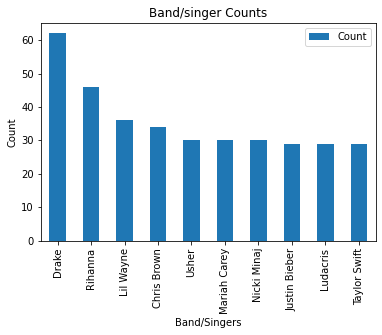

In [ ]:
band.plot(x="band_singer", y="Count",kind="bar", title="Popular Singers")
plt.title("Band/singer Counts")
plt.xlabel("Band/Singers")
plt.ylabel("Count")

2.2 What if we used a different metric?

In [ ]:
ranked_based = billboardtop[["band_singer","ranking"]]
ranked_based

,band_singer,ranking
0,Boyz II Men,1
1,The Cure,71
2,Bryan Adams,70
3,En Vogue,7
4,Mariah Carey,16
...,...,...
4067,SZA,6
4068,Doja Cat,6
4069,Cole Swindell,95
4070,Billie Eilish,94


In [ ]:
new_ranks = ranked_based.groupby(['band_singer']).agg({'ranking':['mean','min','max','median']},sort=False)

In [ ]:
new_ranks.columns = new_ranks.columns.droplevel()

In [ ]:
merged_bands = pd.merge(new_ranks,most_famous,on= "band_singer")

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [ ]:
refine = merged_bands.loc[merged_bands["Count"]>=10]
refine.head()

,band_singer,"(ranking, mean)","(ranking, min)","(ranking, max)","(ranking, median)",Count
17,50 Cent,34.000000,1,87,21.0,15
31,Aaliyah,61.636364,8,96,70.0,11
38,Adele,41.272727,1,88,35.0,11
44,Akon,43.842105,3,88,51.0,19
54,Alicia Keys,41.588235,2,99,47.0,17


In [ ]:
refine.columns

Index([        'band_singer',   ('ranking', 'mean'),    ('ranking', 'min'),
          ('ranking', 'max'), ('ranking', 'median'),               'Count'],
      dtype='object')

In [ ]:
refine[('ranking', 'mean')]

17      34.000000
31      61.636364
38      41.272727
44      43.842105
54      41.588235
          ...    
1219    57.500000
1241    38.266667
1261    39.272727
1266    54.200000
1289    53.400000
Name: (ranking, mean), Length: 86, dtype: float64

In [ ]:
refine["metric"] = refine[('ranking', 'mean')]/refine["Count"]
refine.sort_values(by="metric")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,band_singer,"(ranking, mean)","(ranking, min)","(ranking, max)","(ranking, median)",Count,metric
337,Drake,48.548387,1,99,44.5,62,0.783039
996,Rihanna,40.086957,2,94,30.0,46,0.871456
174,Bruno Mars,19.421053,1,51,16.0,19,1.022161
758,Mariah Carey,35.900000,1,99,33.5,30,1.196667
1241,Usher,38.266667,1,100,24.5,30,1.275556
...,...,...,...,...,...,...,...
411,Florida Georgia Line,61.500000,3,99,68.0,10,6.150000
1196,Tim McGraw,77.583333,40,99,82.0,12,6.465278
733,Luke Bryan,72.300000,49,93,74.0,10,7.230000
194,Carrie Underwood,74.500000,6,100,80.0,10,7.450000


In [ ]:
metric_bands = refine.sort_values(by="metric")
metric_head = metric_bands.head(10)

Text(0, 0.5, 'Metric')

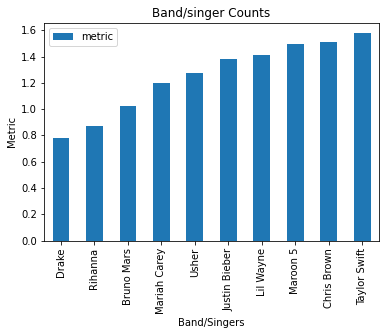

In [ ]:
metric_head.plot(x="band_singer", y="metric",kind="bar", title="Popular Singers by metric")
plt.title("Band/singer Counts")
plt.xlabel("Band/Singers")
plt.ylabel("Metric")